## Linear regression
* using the first feature of diabetes dataset in sk-learn datasets

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# load the dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

In [8]:
diabetes_X[:, np.newaxis, 2].shape

(442, 1)

In [9]:
# we only want to use column3(index2) as the predictor
diabetes_X = diabetes_X[:, np.newaxis, 2]

In [10]:
diabetes_X.shape, diabetes_y.shape

((442, 1), (442,))

In [11]:
# creating the train/test
# we are using the last 20 samples as the test
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# do the same thing on y
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

In [12]:
# creating an empty linear regression object
regr = linear_model.LinearRegression(
    # by entering nothing in the (), you are using the defaut parameters of the function
    # you can also add parameter by yourself
    # you can also add it later, after you declare this object, set_param
)

In [13]:
# fitting this linear regresion to the train_X and train_y
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression()

In [17]:
# beta1
print(regr.coef_[0])
# beta0
print(regr.intercept_)

938.2378612512637
152.91886182616167


In [18]:
# making a prediction on the test_X set
diabetes_y_pred = regr.predict(diabetes_X_test)

In [19]:
# The coefficients
print("Coefficients: \n", regr.coef_[0])
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

Coefficients: 
 938.2378612512637
Mean squared error: 2548.07
Coefficient of determination: 0.47


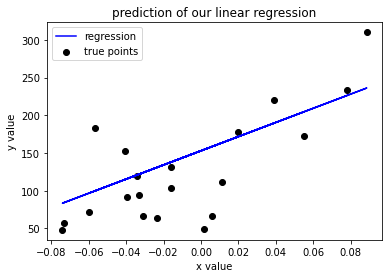

In [20]:
plt.scatter(diabetes_X_test, diabetes_y_test, color='black', label='true points')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', label='regression')
plt.xlabel('x value')
plt.ylabel('y value')
plt.title('prediction of our linear regression')
plt.legend()
plt.show()

## logistic regression

In [21]:
from time import time
import numpy as np
import random
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn import datasets
from sklearn.svm import l1_min_c
from sklearn.utils import shuffle

In [23]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
X.shape,y

X = X[y != 2]
y = y[y != 2]
X.shape,y

# standardization/normalization, which can speed up the convergence
X /= X.max() 

((100, 4),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]))

In [24]:
# do a random shuffle to mix up 0 and 1
X,y = shuffle(X,y)

In [25]:
# train_test_split
train_X = X[:80,]
test_X = X[80:,]

train_y = y[:80,]
test_y = y[80:,]

In [26]:
train_X.shape, train_y.shape, test_X.shape, test_y.shape

((80, 4), (80,), (20, 4), (20,))

In [27]:
# creating an empty LR object
clf = linear_model.LogisticRegression(penalty="l2")

# fit the model
clf.fit(train_X, train_y)

# making the prediction
y_pred = clf.predict(test_X)

In [31]:
# accuracy of the prediction
np.mean(test_y == y_pred)
y_pred

array([1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0])

In [30]:
# get the predicted probability of each instance/sample
clf.predict_proba(test_X)

array([[0.00814973, 0.99185027],
       [0.96318642, 0.03681358],
       [0.96292587, 0.03707413],
       [0.97395144, 0.02604856],
       [0.00145478, 0.99854522],
       [0.97041389, 0.02958611],
       [0.01940588, 0.98059412],
       [0.00384835, 0.99615165],
       [0.97398103, 0.02601897],
       [0.00649933, 0.99350067],
       [0.01019496, 0.98980504],
       [0.00474367, 0.99525633],
       [0.0633527 , 0.9366473 ],
       [0.98680712, 0.01319288],
       [0.95784327, 0.04215673],
       [0.95292787, 0.04707213],
       [0.98451085, 0.01548915],
       [0.02869752, 0.97130248],
       [0.01702505, 0.98297495],
       [0.97703317, 0.02296683]])

## Task: Do the linear regression using the first variable in the iris data set to predict the iris target, plot your prediction line and test sets, verify that we cannot use linear regression to fit the model.

## Random Forest Example

In [ ]:
import matplotlib.pyplot as plt

from collections import OrderedDict
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RANDOM_STATE = 123

X, y = make_classification(
    n_samples=500,
    n_features=25,
    n_clusters_per_class=1,
    n_informative=15,
    random_state=RANDOM_STATE,
)

In [ ]:
ensemble_clfs = [
    (
        "RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(
            warm_start=True,
            oob_score=True,
            max_features="sqrt",
            random_state=RANDOM_STATE,
        ),
    ),
    (
        "RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(
            warm_start=True,
            max_features="log2",
            oob_score=True,
            random_state=RANDOM_STATE,
        ),
    ),
    (
        "RandomForestClassifier, max_features=None",
        RandomForestClassifier(
            warm_start=True,
            max_features=None,
            oob_score=True,
            random_state=RANDOM_STATE,
        ),
    ),
]

In [ ]:
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

min_estimators = 15
max_estimators = 150

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1, 5):
        clf.set_params(n_estimators=i)
        clf.fit(X, y)

        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

In [ ]:
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("# of trees")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

## Recognizing hand-written digits using SVM

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

In [ ]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [ ]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

clf = svm.SVC(gamma=0.001)

X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)

clf.fit(X_train, y_train)
predicted = clf.predict(X_test)

In [ ]:
np.mean(predicted == y_test)

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction, true in zip(axes, X_test, predicted, y_test):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction/true: {prediction, true}")

In [ ]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

## K-means example

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

In [ ]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

estimators = [
    ("k_means_iris_8", KMeans(n_clusters=8)),
    ("k_means_iris_3", KMeans(n_clusters=3)),
    ("k_means_iris_bad_init", KMeans(n_clusters=3, n_init=1, init="random")),
]

In [ ]:
fignum = 1
titles = ["8 clusters", "3 clusters", "3 clusters, bad initialization"]
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(float), edgecolor="k")

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel("Petal width")
    ax.set_ylabel("Sepal length")
    ax.set_zlabel("Petal length")
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

## PCA

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition
from sklearn import datasets

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

In [ ]:
X.shape

In [ ]:
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

In [ ]:
X.shape

In [ ]:
fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
plt.cla()
for name, label in [("Setosa", 0), ("Versicolour", 1), ("Virginica", 2)]:
    ax.text3D(
        X[y == label, 0].mean(),
        X[y == label, 1].mean() + 1.5,
        X[y == label, 2].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
    )
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral, edgecolor="k")

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

In [ ]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
pca = decomposition.PCA(n_components=2)
pca.fit(X)
X = pca.transform(X)

In [ ]:
X.shape

In [ ]:
fig = plt.figure(1, figsize=(10, 5))
# plt.clf()
# ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
# plt.cla()
for name, label in [("Setosa", 0), ("Versicolour", 1), ("Virginica", 2)]:
    plt.scatter(X[y==label, 0], X[y==label, 1], label=name)
# Reorder the labels to have colors matching the cluster results
# y = np.choose(y, [1, 2, 0]).astype(float)
plt.legend()
# ax.w_xaxis.set_ticklabels([])
# ax.w_yaxis.set_ticklabels([])
# ax.w_zaxis.set_ticklabels([])

plt.show()

variable selection: all variable in new space is in old space

PCA: all variable in the new space is not in old space, but calculated from the old space